In [328]:
install.packages("car")
install.packages("dplyr")
install.packages("doBy")
install.packages("magrittr")

# Make plots fit better on screen
ff = read.csv("forestfires.csv")
library(car)
library(ggplot2)
library(dplyr)
library(magrittr)
library(doBy)


The downloaded binary packages are in
	/var/folders/s7/nb600sb97sgbh598nmzzzyhc0000gn/T//RtmpfvWZ3W/downloaded_packages


ERROR: Error in install.packagae("dplyr"): could not find function "install.packagae"


In [356]:
# Make plots fit better on screen
w_h_ratio = 3/3
width = 6
options(repr.plot.width=width, repr.plot.height=width*w_h_ratio)

# Create factor for month
off=ff[order(ff$area),]
ofmonth=factor(off$month, levels = c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep","oct", "nov", "dec"))
ofday=factor(off$day, levels = c("mon", "tue", "wed", "thu", "fri", "sat", "sun"))

# Entire data
oRH=off$RH
oTemp=off$temp
oArea=off$area
oLogArea=log(off$area+1)

oFFMC=off$FFMC
oDMC=off$DMC
oDC=off$DC
oISI =off$ISI

# create data frame
frame_data = data.frame(ofmonth,ofday, oArea, oLogArea, oRH, oTemp, oFFMC, oDMC, oDC, oISI)
frame_data2 = subset(frame_data, oArea>10)




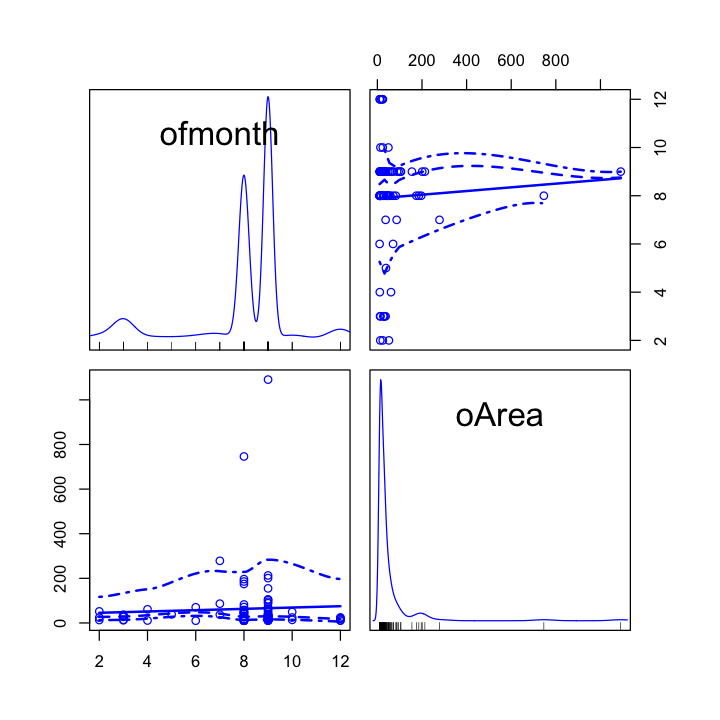

In [357]:
# 1. Bivariate relationship: month vs Area
scatterplotMatrix(~ofmonth + oArea, data=frame_data2)

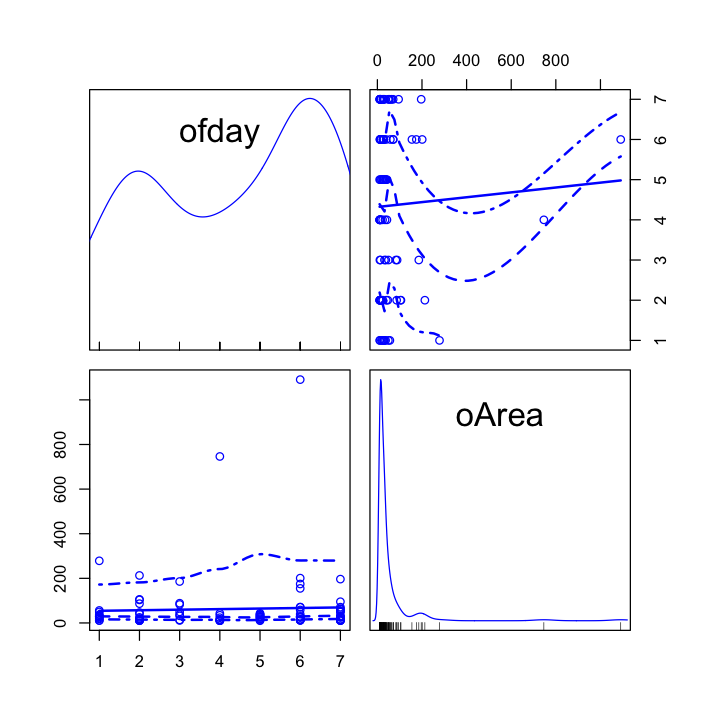

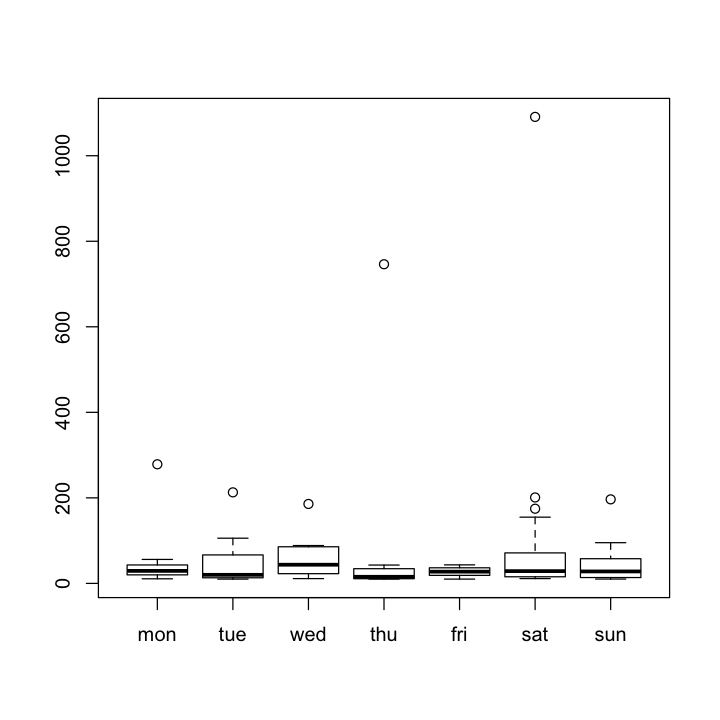

In [358]:
# 2. Bivariate relationship: day vs Area
scatterplotMatrix(~ofday + oArea, data=frame_data2)
boxplot(oArea~ofday,data=frame_data2)

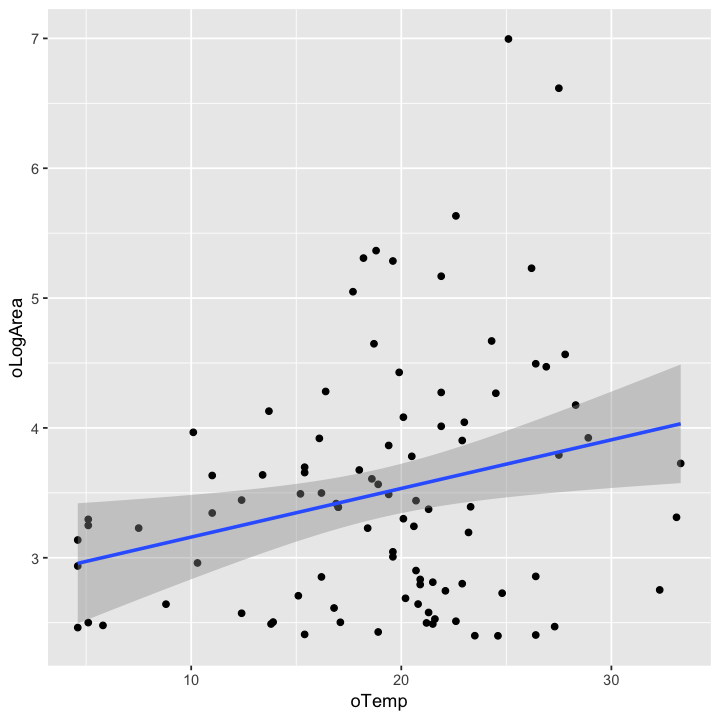

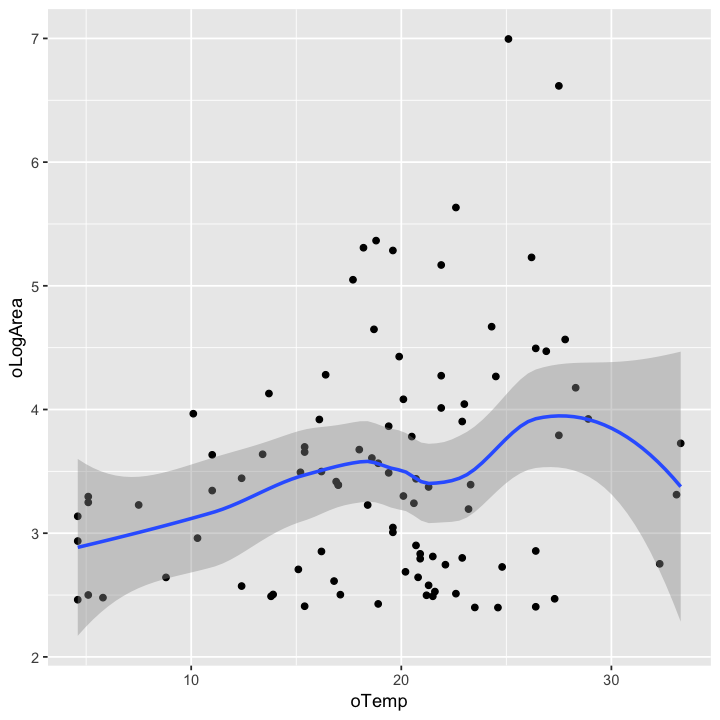

In [382]:
# 3. Bivariate relationship: temp vs Area

# plot(oTemp, oLogArea)
# m1<-lm(oLogArea ~ oTemp, data=frame_data2)
# abline(coef(m1), col = "blue")
ggplot(data=frame_data2, aes(oTemp,oLogArea))  +geom_point() + geom_smooth(method = "lm")
ggplot(data=frame_data2, aes(oTemp,oLogArea))  +geom_point() + geom_smooth(method = "loess")

Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

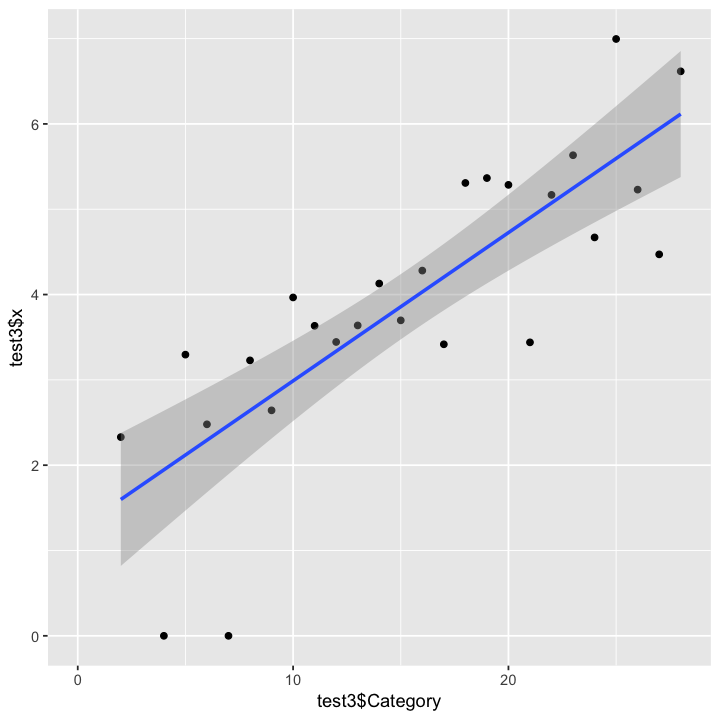

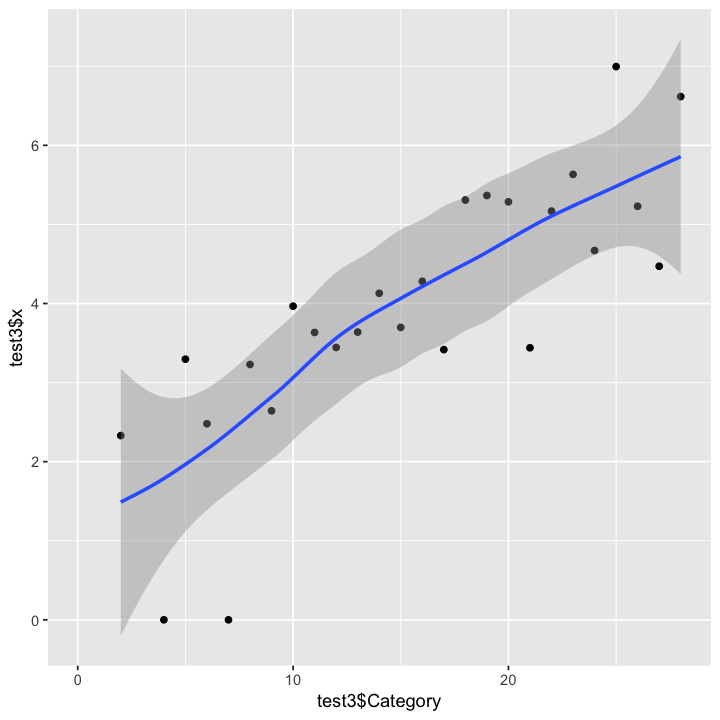

In [389]:
# grouping and choose only max value

test=data.frame(oTemp2=round(oTemp), oLogArea)
test3=aggregate(test$oLogArea, by = list(Category=test$oTemp2), max)
# plot(test3$Category, test3$x)
# m1<-lm(test3$x ~ test3$Category, data=test3)
# abline(coef(m1), col = "blue")
ggplot(data=test3, aes(test3$Category,test3$x)) + geom_point() + geom_smooth(method="glm")+ xlim(0,28)
ggplot(data=test3, aes(test3$Category,test3$x)) + geom_point() + geom_smooth(method="loess") + xlim(0,28)

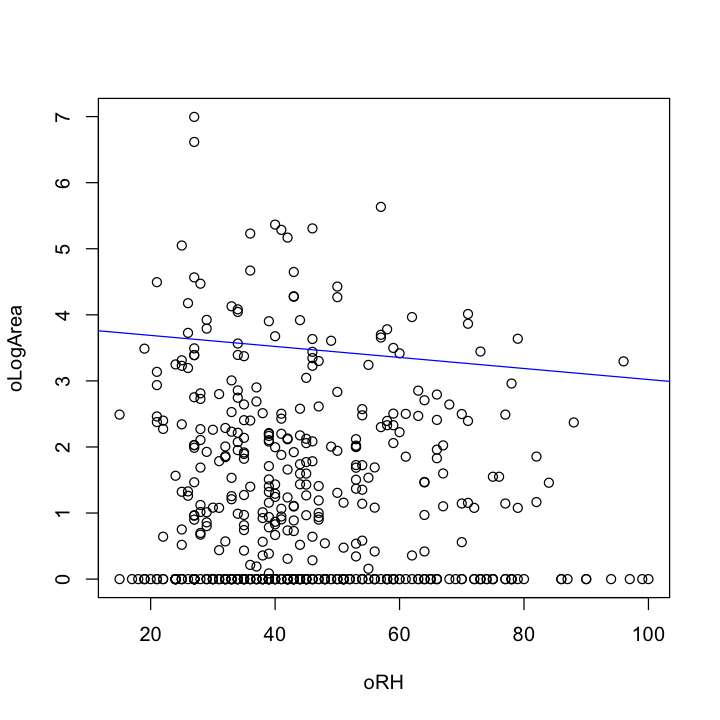

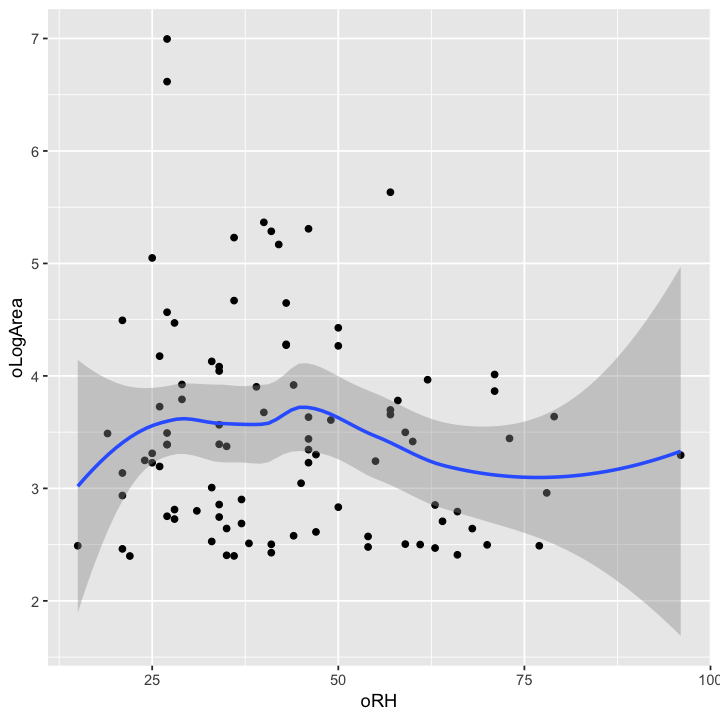

In [360]:
# 4. Bivariate relationship: RH vs Area  
# no processing

plot(oRH, oLogArea)
m1<-lm(oLogArea ~ oRH, data=frame_data2)
abline(coef(m1), col = "blue")
ggplot(data=frame_data2, aes(oRH,oLogArea)) + geom_point() + geom_smooth(method = "loess")




Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 8 rows containing missing values (geom_point).”

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 8 rows containing missing values (geom_point).”

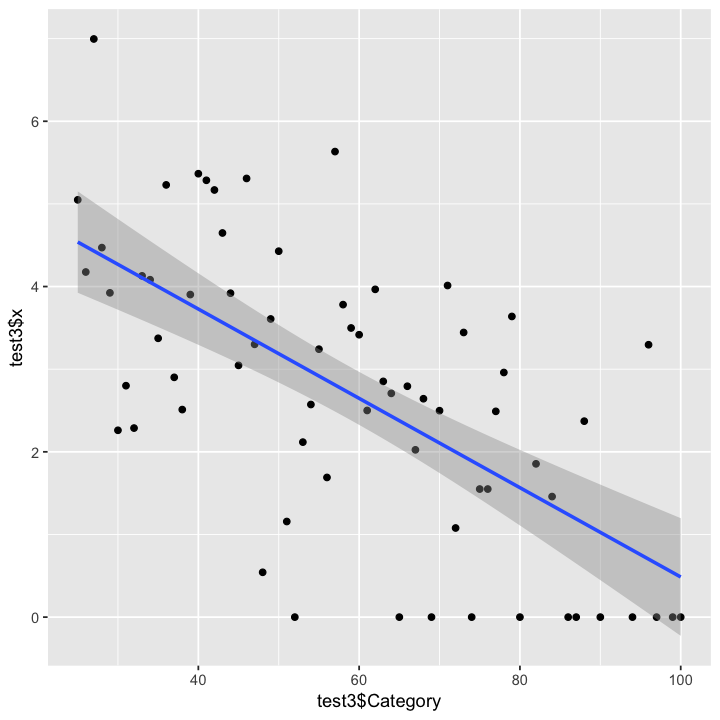

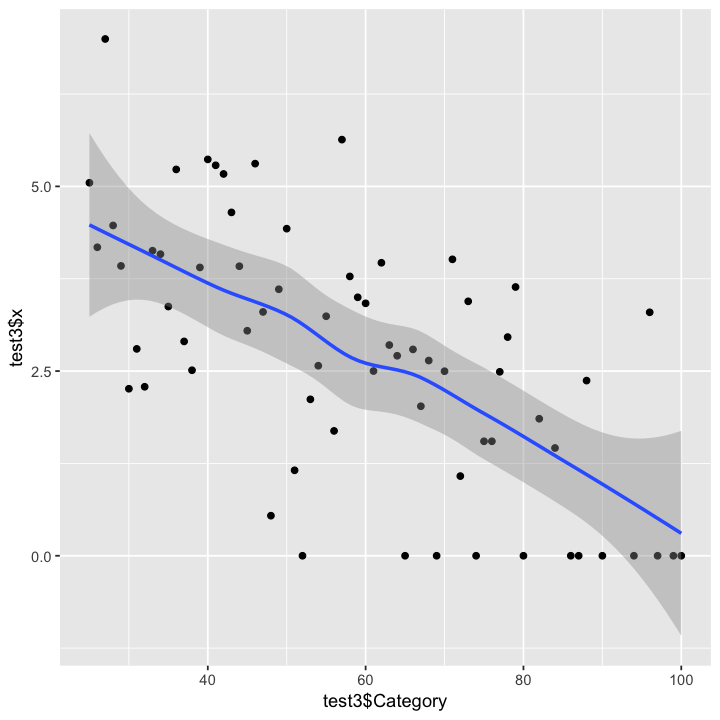

In [394]:
# grouping and choose only max value

test=data.frame(oRH2=round(oRH), oLogArea)
test3=aggregate(test$oLogArea, by = list(Category=test$oRH2), max)

# plot(test3$Category, test3$x)
# m1<-lm(test3$x ~ test3$Category, data=test3)
# abline(coef(m1), col = "blue")
ggplot(data=test3, aes(test3$Category,test3$x)) + geom_point() + geom_smooth(method="glm")+xlim(25,100)
ggplot(data=test3, aes(test3$Category,test3$x)) + geom_point() + geom_smooth(method="loess") +xlim(25,100)

Warning message:
“Removed 7 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 7 rows containing missing values (geom_point).”Warning message:
“Removed 7 rows containing missing values (geom_point).”

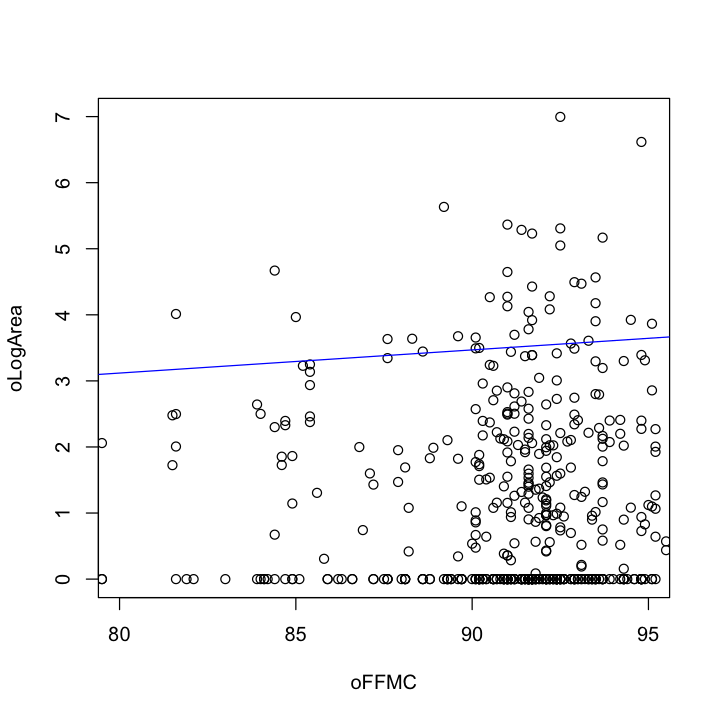

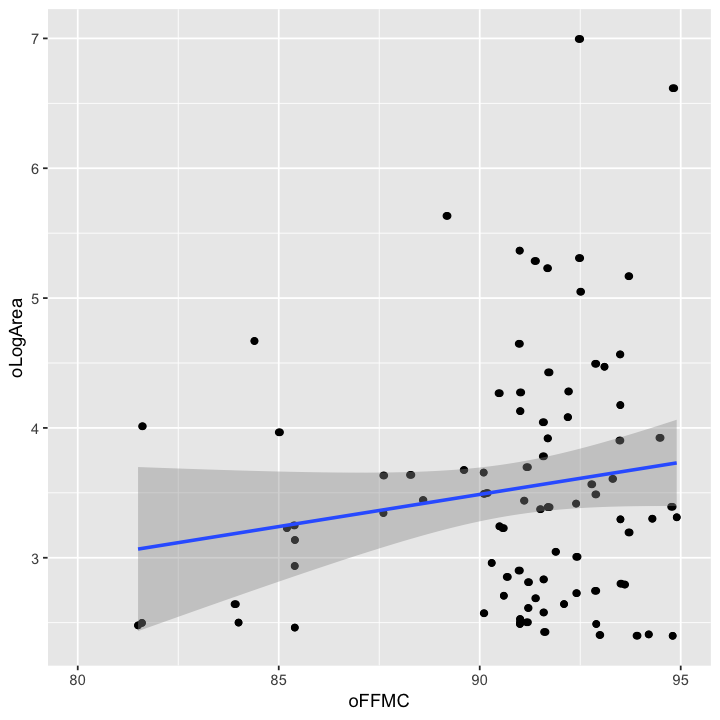

In [395]:
# 5. Bivariate relationship: FFMC vs Area
# no processing 
plot(oFFMC, oLogArea, xlim=c(80,95))
m1<-lm(oLogArea ~ oFFMC, data=frame_data2)
abline(coef(m1), col = "blue")
ggplot(data=frame_data2, aes(oFFMC,oLogArea)) +  geom_jitter() + geom_point() + geom_smooth(method = "gam") + xlim(80,95)

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

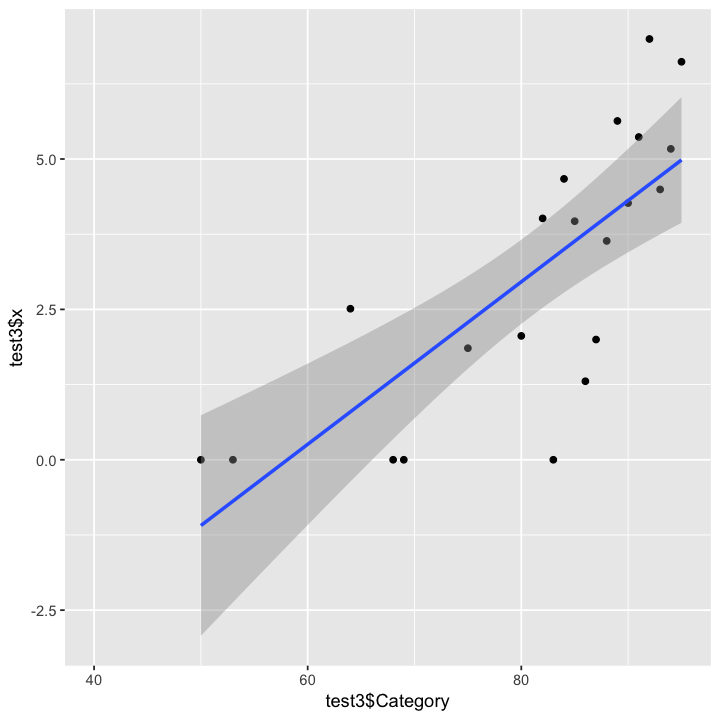

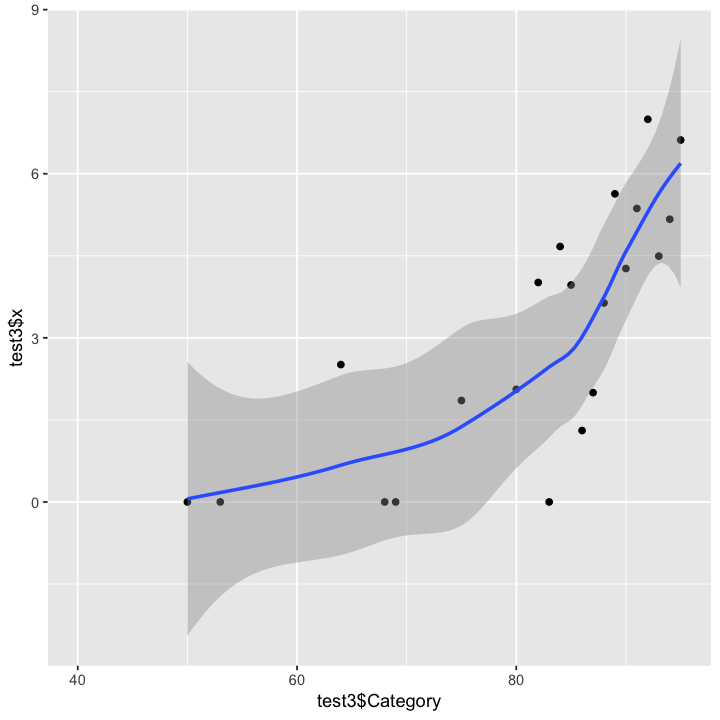

In [396]:
# grouping and choose only max value

test=data.frame(oFFMC2=round(oFFMC), oLogArea)
test3=aggregate(test$oLogArea, by = list(Category=test$oFFMC2), max)

#plot(test3$Category, test3$x)
#m1<-lm(test3$x ~ test3$Category, data=test3)
#abline(coef(m1), col = "blue")
ggplot(data=test3, aes(test3$Category,test3$x)) + geom_point() + geom_smooth(method="lm") +xlim(40,95)
ggplot(data=test3, aes(test3$Category,test3$x)) + geom_point() + geom_smooth(method="loess") +xlim(40,95)

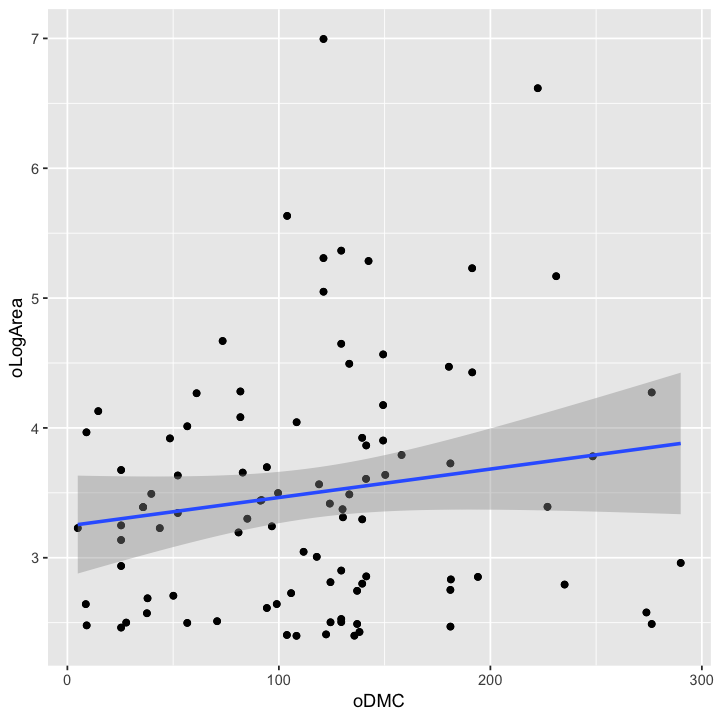

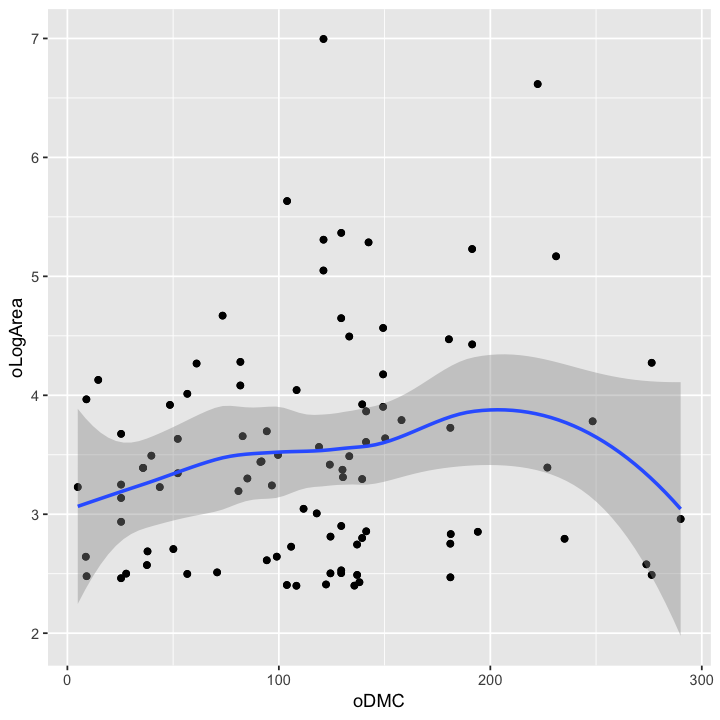

In [397]:
# 6. Bivariate relationship: DMC vs Area
#frame_data = data.frame(ofmonth,ofday, oArea, oLogArea, oRH, oTemp, oFFMC, oDMC, oDC, oISI)
# plot(oDMC, oLogArea)
# m1<-lm(oLogArea ~ oDMC, data=frame_data2)
# abline(coef(m1), col = "blue")
ggplot(data=frame_data2, aes(oDMC,oLogArea)) + geom_jitter() + geom_point() + geom_smooth(method = "lm") 
ggplot(data=frame_data2, aes(oDMC,oLogArea)) + geom_jitter() + geom_point() + geom_smooth(method = "loess") 

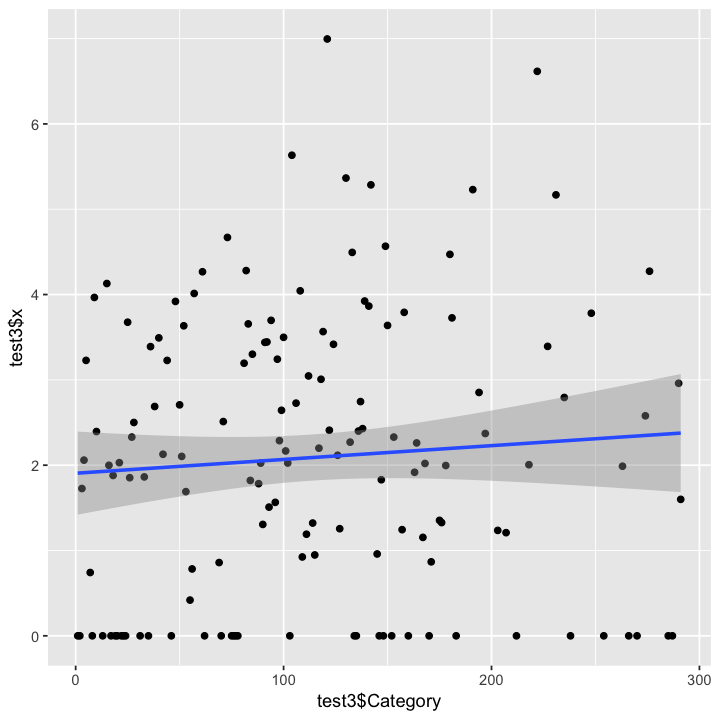

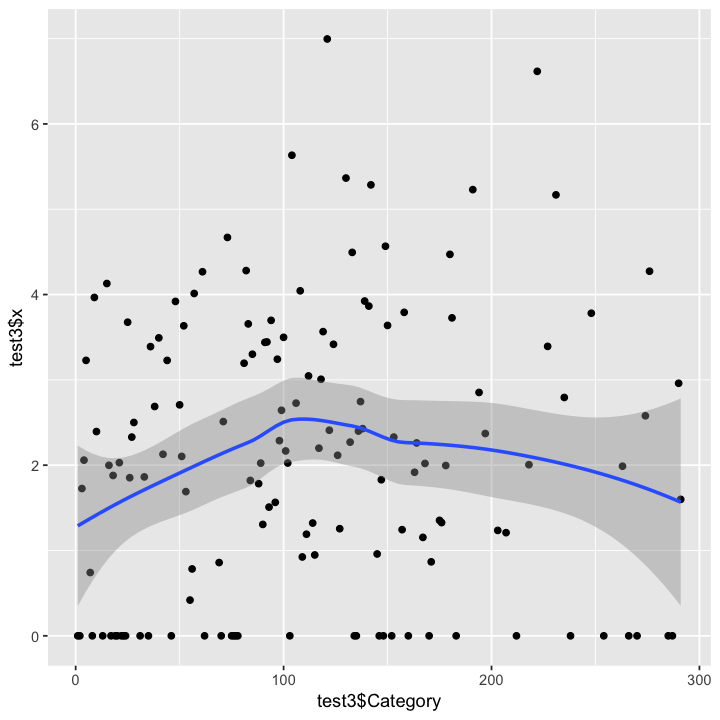

In [400]:
# grouping and choose only max value

test=data.frame(oDMC2=round(oDMC), oLogArea)
test3=aggregate(test$oLogArea, by = list(Category=test$oDMC2), max)

#plot(test3$Category, test3$x)
#m1<-lm(test3$x ~ test3$Category, data=test3)
#abline(coef(m1), col = "blue")
ggplot(data=test3, aes(test3$Category,test3$x)) + geom_point() + geom_smooth(method="lm") 
ggplot(data=test3, aes(test3$Category,test3$x)) + geom_point() + geom_smooth(method="loess")

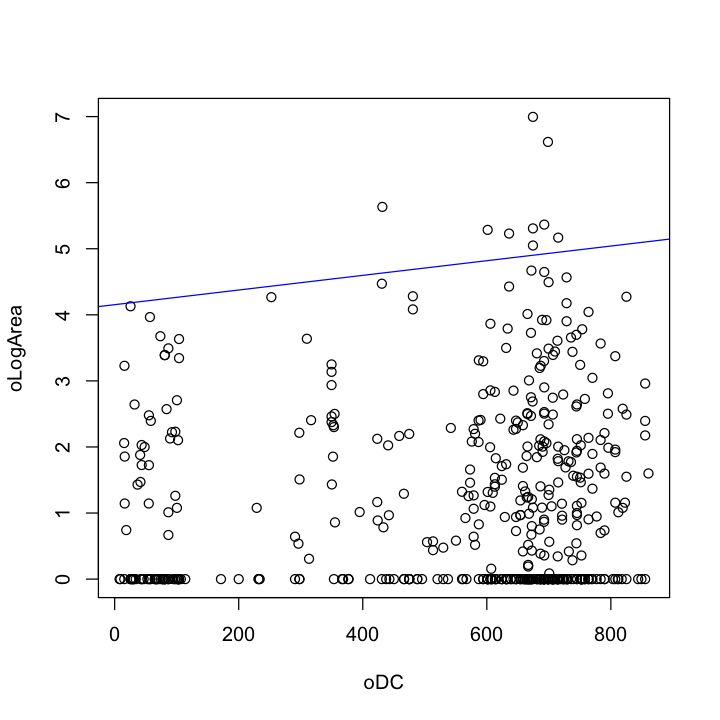

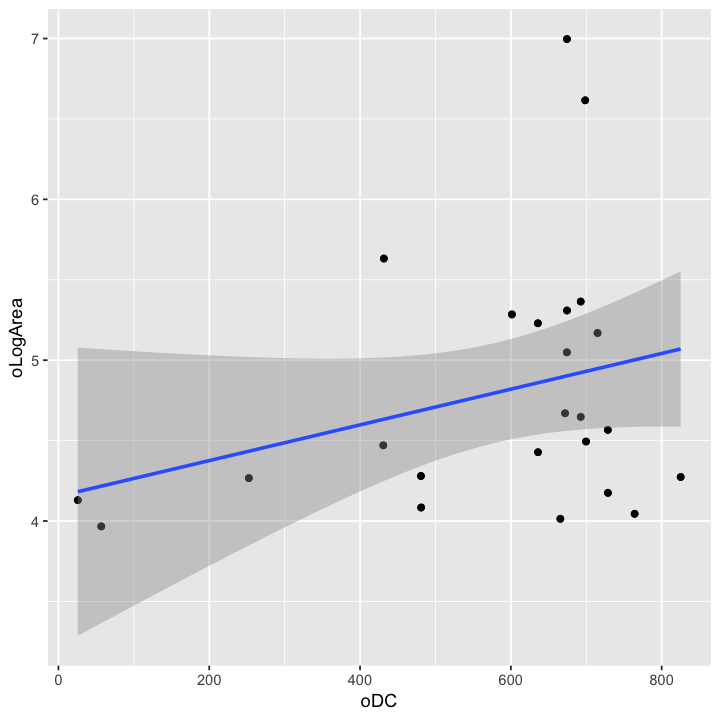

In [267]:
# 7. Bivariate relationship: DC vs Area
#frame_data = data.frame(ofmonth,ofday, oArea, oLogArea, oRH, oTemp, oFFMC, oDMC, oDC, oISI)
plot(oDC, oLogArea)
m1<-lm(oLogArea ~ oDC, data=frame_data2)
abline(coef(m1), col = "blue")
ggplot(data=frame_data2, aes(oDC,oLogArea)) + geom_jitter()+geom_point() + geom_smooth(method = "glm") 

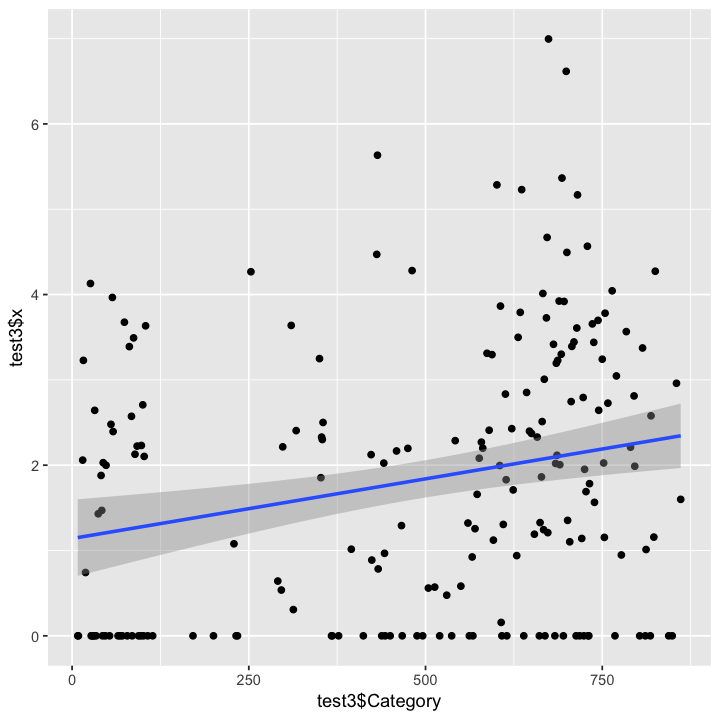

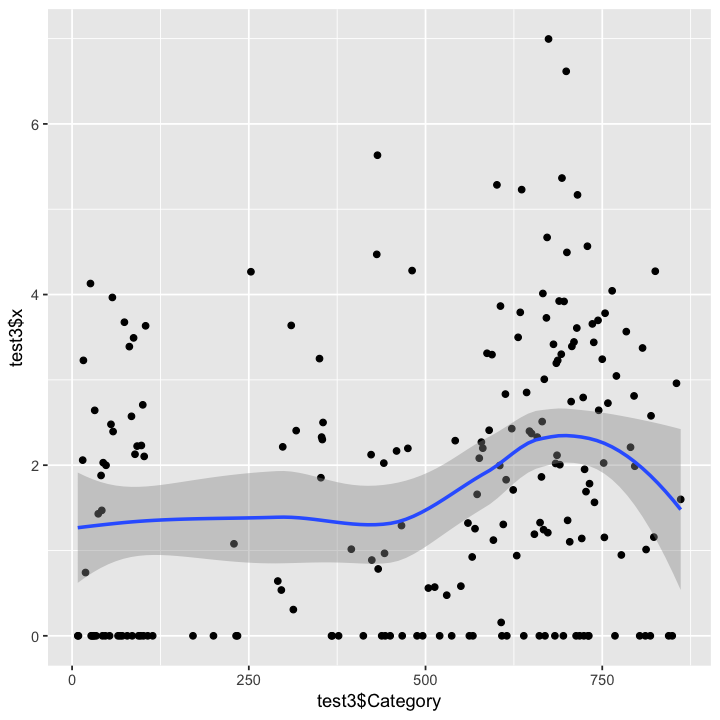

In [401]:
# grouping and choose only max value

test=data.frame(oDC2=round(oDC), oLogArea)
test3=aggregate(test$oLogArea, by = list(Category=test$oDC2), max)

#plot(test3$Category, test3$x)
#m1<-lm(test3$x ~ test3$Category, data=test3)
#abline(coef(m1), col = "blue")
ggplot(data=test3, aes(test3$Category,test3$x)) + geom_point() + geom_smooth(method="lm") 
ggplot(data=test3, aes(test3$Category,test3$x)) + geom_point() + geom_smooth(method="loess")

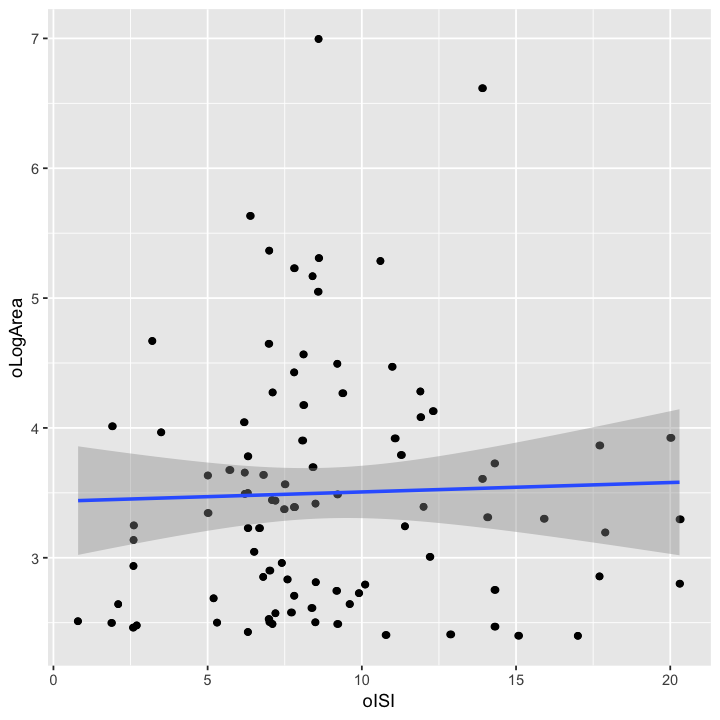

In [402]:
# 8. Bivariate relationship: ISI vs Area
#frame_data = data.frame(ofmonth,ofday, oArea, oLogArea, oRH, oTemp, oFFMC, oDMC, oDC, oISI)
# plot(oISI, oLogArea)
# m1<-lm(oLogArea ~ oISI, data=frame_data2)
# abline(coef(m1), col = "blue")
ggplot(data=frame_data2, aes(oISI,oLogArea)) + geom_jitter() +geom_point() + geom_smooth(method = "lm") 
ggplot(data=frame_data2, aes(oISI,oLogArea)) + geom_jitter() +geom_point() + geom_smooth(method = "loess") 

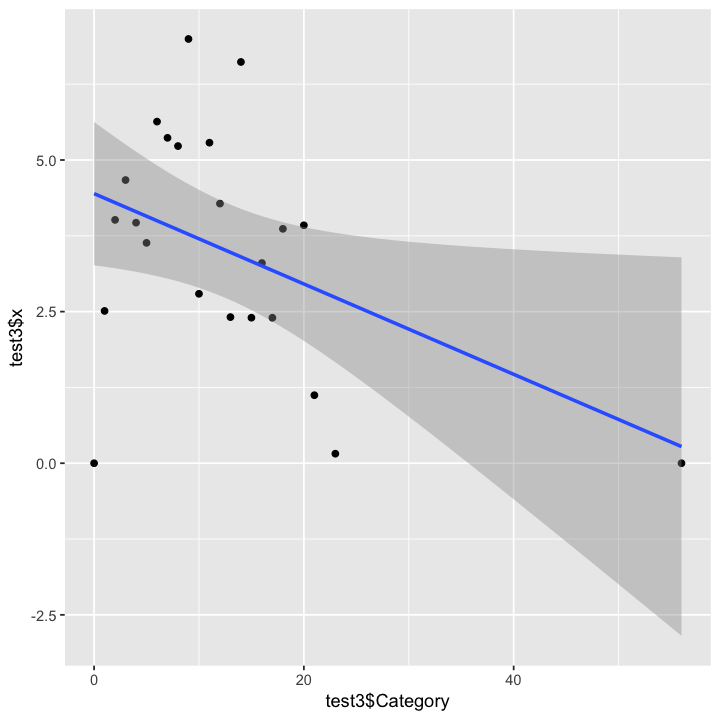

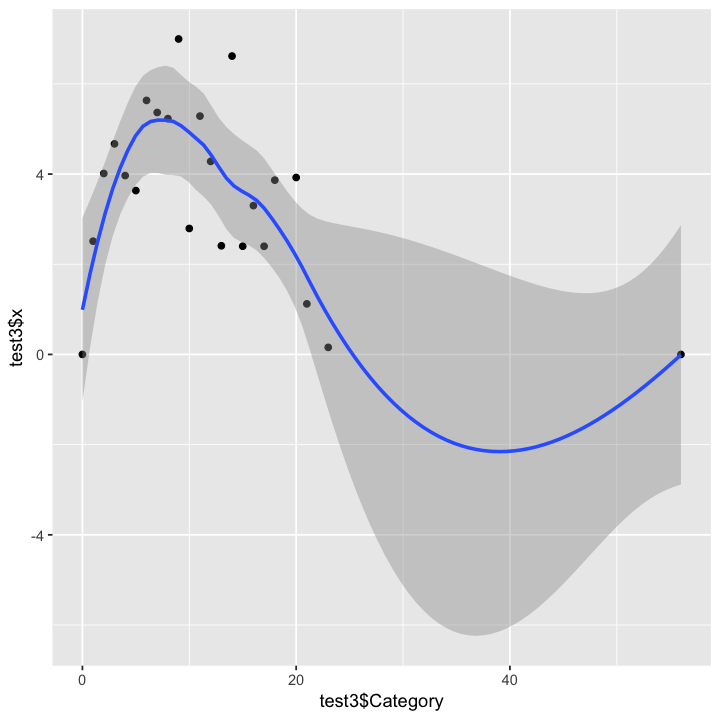

In [403]:
# grouping and choose only max value

test=data.frame(oISI2=round(oISI), oLogArea)
test3=aggregate(test$oLogArea, by = list(Category=test$oISI2), max)

#plot(test3$Category, test3$x)
#m1<-lm(test3$x ~ test3$Category, data=test3)
#abline(coef(m1), col = "blue")
ggplot(data=test3, aes(test3$Category,test3$x)) + geom_point() + geom_smooth(method="lm") 
ggplot(data=test3, aes(test3$Category,test3$x)) + geom_point() + geom_smooth(method="loess")

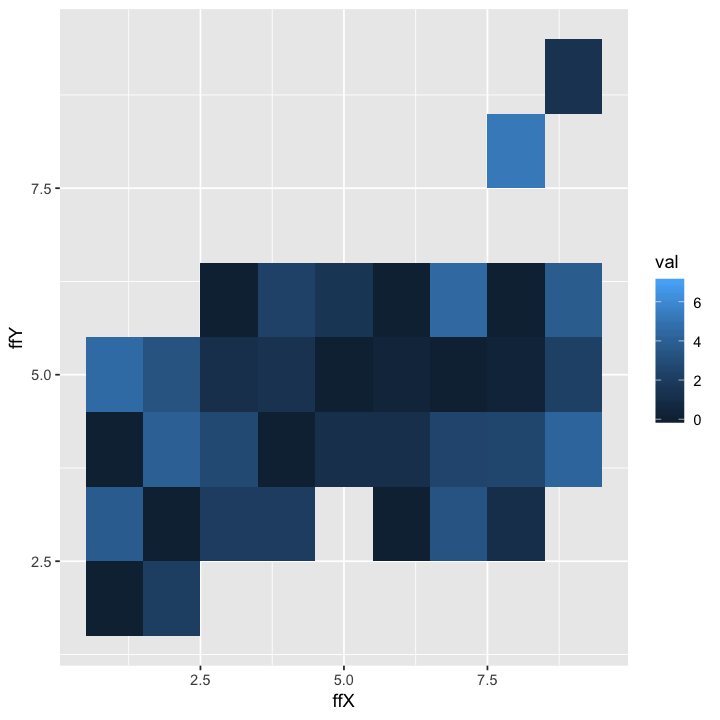

In [404]:
m= matrix( rep( 0, len=max(ff$X)*max(ff$Y)), nrow = max(ff$X))
ffX=ff$X
ffY=ff$Y
val=log(ff$area+1)
dframe_XYarea = data.frame(ffX,ffY,val)
library(ggplot2)

ggplot(data = dframe_XYarea, aes(x=ffX, y=ffY, fill=val)) + 
  geom_tile()
    
#image(m, axes = FALSE, col = grey(seq(0, 1, length = 256)))